In [1]:
import requests
import os 
import pandas as pd

# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [2]:
citybikes_df = pd.read_csv('citybikes.csv')

api_key = os.environ.get("stats_project")
header_auth = {
    "accept": "application/json",
    "Authorization": api_key
}

for index, row in citybikes_df.iterrows():
  lat = row['latitude']
  long = row['longitude']
  url = "https://api.foursquare.com/v3/places/search?ll={0}%2C{1}&radius=1000&limit=50".format(lat,long)
  response = requests.get(url, headers=header_auth)

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [ ]:
POI = []

for index, row in citybikes_df.iterrows():
  name = row['name']
  lat = row['latitude']
  long = row['longitude']
  url = "https://api.foursquare.com/v3/places/search?ll={0}%2C{1}&radius=1000&limit=50&categories=4bf58dd8d48988d1ca941735".format(lat,long) #category id is for pizzerias
  response = requests.get(url, headers=header_auth)
  data = response.json()
  for key,value in data.items():
        for v in value:
            if type(v) is dict and len(v['categories']) != 0:
                POI.append({'Name' : v['name'], 'Address' : v['location']['formatted_address'], 'Closed bucket' : v['closed_bucket'], 'Distance' : v['distance'], 'Latitude' : row['latitude'], 'Longitude' : row['longitude']})

Put your parsed results into a DataFrame

In [4]:
df = pd.json_normalize(POI)
df.to_csv('FSQ_API_data.csv', index=False)

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [5]:
citybikes_df = pd.read_csv('citybikes.csv')

api_key = os.environ.get("yelp_key")
final_key = "Bearer " + api_key
header_auth = {
    "accept": "application/json",
    "Authorization": final_key}  

counter = 0 

for index, row in citybikes_df.iterrows():
  name = row['name']
  lat = row['latitude']
  long = row['longitude']
  url = "https://api.yelp.com/v3/businesses/search?term=Restaurants&latitude={0}&longitude={1}&radius=1000&limit=50".format(lat,long)
  response = requests.get(url, headers=header_auth)
  counter += 1
  if counter == 400: #Taking a subset of first 400 bike stations
    print("Counter has reached 400, loop has been broken")
    break 


Counter has reached 400, loop has been broken


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [6]:
yelp_POI = []

counter = 0 

#print(citybikes_df.iterrows())
#for index, row in citybikes_df.iterrows():
    #print(index, row)

for index, row in citybikes_df.iterrows():
  name = row['name']
  lat = row['latitude']
  long = row['longitude']
  url = "https://api.yelp.com/v3/businesses/search?term=Restaurants&latitude={0}&longitude={1}&radius=1000&limit=50&categories=pizza%2C%20All".format(lat,long)
  response = requests.get(url, headers=header_auth)
  counter += 1
  if counter == 400: #Taking a subset of 400 bike stations
    print("Counter has reached 400, loop has been broken")
    break 
  
  data = response.json()
  for business in data['businesses']:
    location_str = ""
    name = business['name']
    rating = business['rating']
    distance = business['distance']
    location = business['location']['display_address']
    for entry in location:
      location_str = location_str + entry + " "
    #print("Name : " + business['name'] + " Business Rating: " + str(business['rating']) + " Business Location : " + location_str)
    yelp_POI.append({'Name' : name, 'Address' : location_str, 'Rating' : str(rating), 'Distance' : distance, 'Latitude' : row['latitude'], 'Longitude' : row['longitude']})

Counter has reached 400, loop has been broken


Put your parsed results into a DataFrame

In [7]:
df = pd.json_normalize(yelp_POI)
df.to_csv('Yelp_data.csv', index=False)

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

- Yelp API provided more complete data as there is more information on more businesses. Foursquare did not provide this much data.

Get the top 10 restaurants according to their rating

In [ ]:
yelp_df = pd.read_csv('Yelp_data.csv')

df_top_10 = yelp_df.sort_values(by='Rating',ascending=False)
df_top_10.head(10) #displaying top 10 pizzerias

,Name,Address,Rating,Distance,Latitude,Longitude
3194,Libretto Slice Shop,"220 Yonge Street Toronto, ON M5B 2H1 Canada",5.0,373.651725,43.656729,-79.382736
8971,Par-Tee Pong,"26 Duncan St 2nd Floor Toronto, ON M5V 2B8 Can...",5.0,587.396807,43.644070,-79.392900
4475,Burning Pizza,"615 Queen Street W Toronto, ON M5V 2B7 Canada",5.0,1276.280704,43.652327,-79.388254
12696,Pure Pizza and Burgers,"314 Parliament Street Toronto, ON M5A 2Z7 Canada",5.0,1270.063483,43.669232,-79.374495
8930,Burning Pizza,"615 Queen Street W Toronto, ON M5V 2B7 Canada",5.0,1502.550372,43.660296,-79.397107
2984,Burning Pizza,"335 Yonge Street World Food Market Toronto, ON...",5.0,1490.175580,43.669244,-79.389400
5246,Pala 148,"148 Cumberland Street Toronto, ON M5R 1A8 Canada",5.0,2036.469867,43.657266,-79.374756
10495,Par-Tee Pong,"26 Duncan St 2nd Floor Toronto, ON M5V 2B8 Can...",5.0,863.966677,43.646162,-79.378912
4484,Libretto Slice Shop,"220 Yonge Street Toronto, ON M5B 2H1 Canada",5.0,679.641842,43.652327,-79.388254
12938,Fantasy Kitchen,"2385 Dundas Street W Toronto, ON M6P 1X2 Canada",5.0,944.669925,43.657160,-79.464780


(15585, 6)


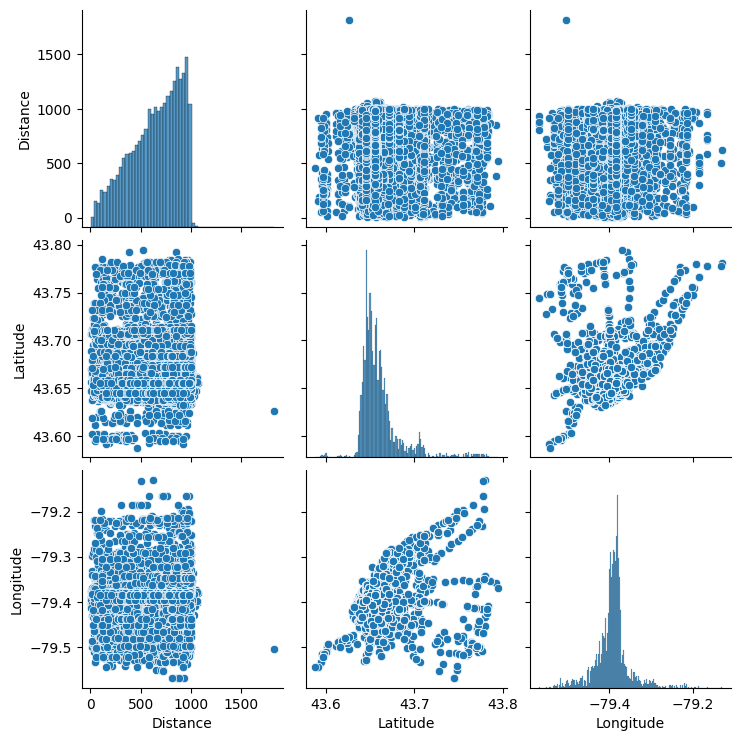

In [ ]:
#EDA OF FSQ DATA:

import numpy as np

import seaborn as sns

FSQ_df = pd.read_csv('FSQ_API_Data.csv')

print(FSQ_df.shape) #check how many variables and observations

FSQ_df.dtypes #check the column names and their data types

#check for duplicate restaurant entries based on all columns
duplicates = FSQ_df[FSQ_df.duplicated()]
duplicates #no duplicates found

#count null values per column 
null_values = FSQ_df.isnull().sum()
null_values #no null values found 

#check for relationships
sns.pairplot(FSQ_df) #one obvious outlier seen when plotting distance with latitude and longitude. The outlier has not been excluded as it do not make sense and could therefore be the result of a measurement error.


(12987, 6)


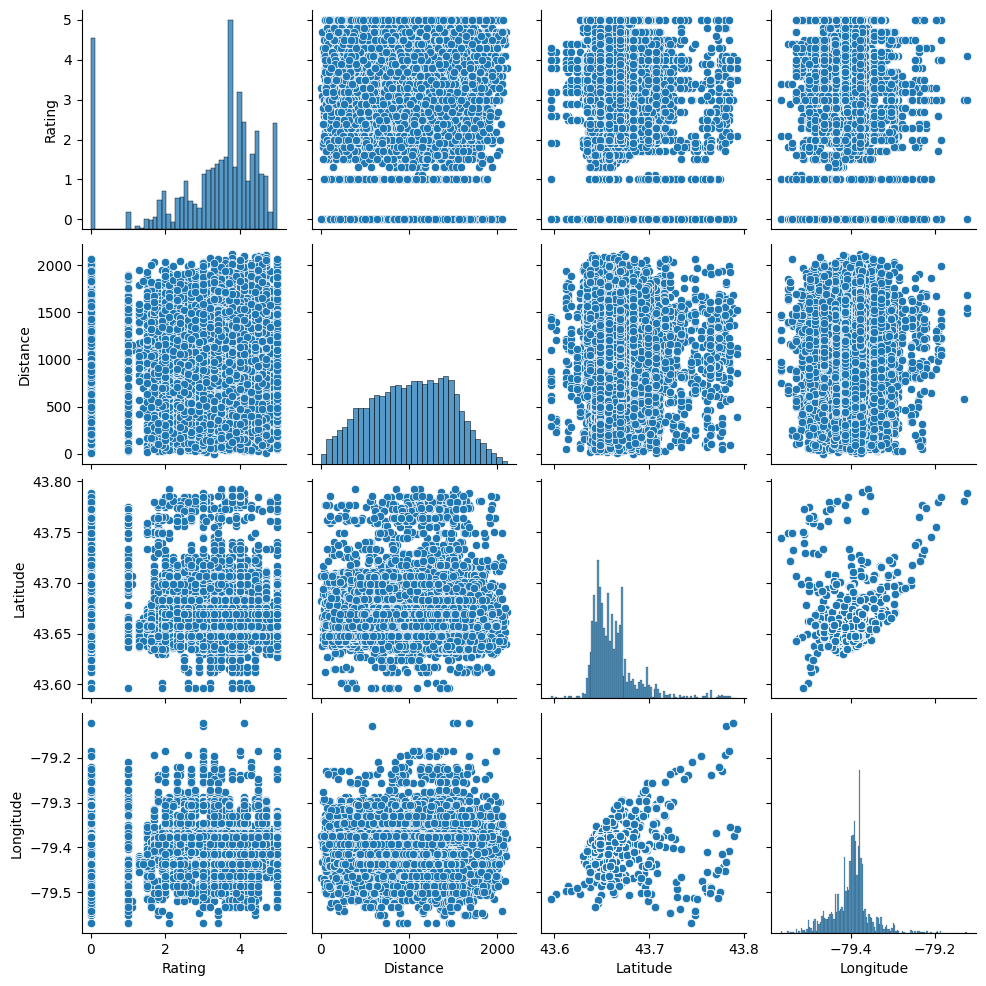

In [19]:
#EDA OF YELP DATA:

Yelp_df = pd.read_csv('Yelp_Data.csv')

print(Yelp_df.shape) #check how many variables and observations

Yelp_df.dtypes #check the column names and their data types

#check for duplicate restaurant entries based on all columns
duplicates = Yelp_df[Yelp_df.duplicated()]
duplicates #no duplicate found

#count null values per column 
null_values = Yelp_df.isnull().sum()
null_values #no null values found 

#check for relationships
sns.pairplot(Yelp_df) #some outliers seen when plotting distance with longitude. These outliers have not been excluded as they do not make sense and could therefore be the result of a measurement error.
